<a href="https://colab.research.google.com/github/Chaotic-Legend/CMP-414-Codes/blob/main/Project%201%3A%20Malignant%20Lung%20Nodule%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Malignant Lung Nodule Detection

In this project, you will develop a deep learning model to classify lung nodules as benign or malignant from 3D CT scans, utilizing the LUNA16 dataset. This task involves data preprocessing, model design, training, and evaluation, offering hands-on experience with medical image analysis and deep learning in PyTorch.
#### CMP 414: Data Management and Analysis - Isaac D. Hoyos

## 1. Load Annotation Data
As the first step, we need to load the processed annotation data created in class. Please review the "DataPreparation" notebook for details.

1.1 Upload the `annotations.csv` file to the current Colab environment.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import os

annotations = 'annotations.csv'
# We first check whether the CSV file already exists in the current environment.
if not os.path.exists(annotations):
    print(f"⬆️ Please upload the \"annotations.csv\" file...\n")
    while True:
        uploaded = files.upload()

        # We retrieve the name of the uploaded file.
        uploaded_filename = list(uploaded.keys())[0]

        # We verify whether the uploaded file matches the expected annotations.csv file.
        if uploaded_filename == annotations:
            print(f"\n✅ File \"annotations.csv\" has been uploaded successfully!")
            break
        else:
            print(f"\n❌ Error: Please upload the correct \"annotations.csv\" file...\n")
else:
    print(f"✅ Using the uploaded \"annotations.csv\" file.")

# We read the uploaded CSV file into a pandas DataFrame.
annotations_df = pd.read_csv(annotations)

# We display the first five rows of the annotations DataFrame to confirm successful loading.
print("\n=== First 5 Rows of the annotations.csv DataFrame ===")
annotations_df.head()

⬆️ Please upload the "annotations.csv" file...



Saving annotations.csv to annotations.csv

✅ File "annotations.csv" has been uploaded successfully!

=== First 5 Rows of the annotations.csv DataFrame ===


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


1.2 Load the `candidates_processed.csv` file as a data frame and display the first five rows.

In [ ]:
from google.colab import files
import os

candidates_processed = 'candidates_processed.csv'

# We first check whether the CSV file already exists in the current environment.
if not os.path.exists(candidates_processed):
    print(f"⬆️ Please upload the \"candidates_processed.csv\" file...\n")

    while True:
        uploaded = files.upload()

        # We retrieve the name of the uploaded file.
        uploaded_filename = list(uploaded.keys())[0]

        # We verify whether the uploaded file matches the expected candidates_processed.csv file.
        if uploaded_filename == candidates_processed:
            print(f"\n✅ File \"candidates_processed.csv\" has been uploaded successfully!")
            break
        else:
            print(f"\n❌ Error: Please upload the correct \"candidates_processed.csv\" file...\n")
else:
    print(f"✅ Using the uploaded \"candidates_processed.csv\" file.")

# We read the uploaded CSV file into a pandas DataFrame.
candidates_processed_df = pd.read_csv(candidates_processed)

# We display the first five rows of the candidates_processed DataFrame to confirm successful loading.
print("\n=== First 5 Rows of the candidates_processed.csv DataFrame ===")
candidates_processed_df.head()

⬆️ Please upload the "candidates_processed.csv" file...



Saving candidates_processed.csv to candidates_processed.csv

✅ File "candidates_processed.csv" has been uploaded successfully!

=== First 5 Rows of the candidates_processed.csv DataFrame ===


,seriesuid,coordX,coordY,coordZ,class,index,row,col
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-66.383107,57.143607,-60.885862,0,110,331,173
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-132.856859,23.813034,-274.350845,0,24,287,86
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,84.770000,66.170000,-249.880000,0,34,343,371
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,134.805360,29.696241,-268.116009,0,27,295,437
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-87.092676,41.722383,-208.831394,0,51,311,146


1.3 Display the number of class 0 (benign) records and the number of class 1 (malignant) records. Your results should indicate that the two classes are highly imbalanced.

=== Class Distribution ===
Number of Benign Records (Class 0): 78997
Number of Malignant Records (Class 1): 138


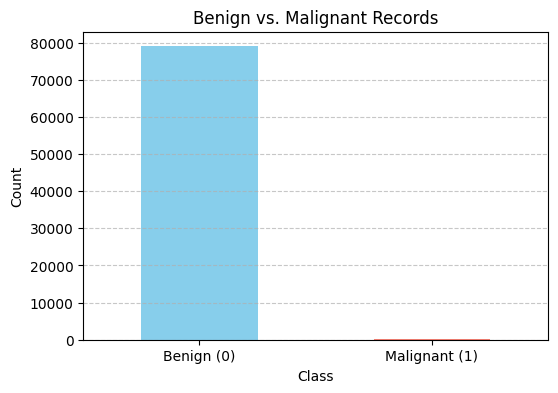

In [ ]:
import matplotlib.pyplot as plt

# We count the number of benign (0) and malignant (1) nodules in the dataset.
if 'class' in candidates_processed_df.columns:
    class_counts = candidates_processed_df['class'].value_counts().sort_index()
    print("=== Class Distribution ===")
    print(f"Number of Benign Records (Class 0): {class_counts.get(0, 0)}")
    print(f"Number of Malignant Records (Class 1): {class_counts.get(1, 0)}")

    # We visualize the class imbalance using a bar chart to compare benign and malignant records.
    plt.figure(figsize=(6, 4))
    class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Benign vs. Malignant Records')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("❌ Error: The class column was not found in the \"candidates_processed.csv\" file.")

## 2. Find Nodule Locations
In the annotation dataset, the center of each identified lung nodule is marked with its 3D coordinates. We will convert these coordinates into three indices to locate the specific subarray in each CT scan tensor corresponding to the nodule.

Please follow the steps outlined in the LUNA16DataPreparation notebook to generate a CSV file named `candidates_processed.csv`, which will store the indices for the center of each lung nodule.

2.1 Load the `subset0.zip` from Google Drive using the file ID `1OFa8UhDvCrcTj1VkFLa7RjifEqMD4TAa`. Extract the zip file to reveal the .mhd and .raw files.

In [ ]:
import gdown
import zipfile
from tqdm import tqdm

# We define the Google Drive file ID for subset0.zip and set the local ZIP path and extraction directory.
file_id = "1OFa8UhDvCrcTj1VkFLa7RjifEqMD4TAa"
zip_path = "subset0.zip"
extract_dir = "subset0_files"

# We download the ZIP file from Google Drive if it does not already exist in the environment.
if not os.path.exists(zip_path):
    print("⬇️ Downloading the \"subset0.zip\" file from Google Drive...\n")
    gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)
    print("\n☑️ File \"subset0.zip\" has been downloaded successfully!")
else:
    print("📦 Using the downloaded \"subset0.zip\" file.")

# We extract the downloaded ZIP file to the specified directory while showing the extraction progress.
if not os.path.exists(extract_dir):
    print("\n📦 Extracting the downloaded \"subset0.zip\" file...\n")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        file_list = zip_ref.namelist()
        for file in tqdm(file_list, desc="Extracting ZIP File", unit="file"):
            zip_ref.extract(file, extract_dir)
    print("\n\n✅ File \"subset0.zip\" has been extracted successfully!")
else:
    print("\n📁 Opening the extracted \"subset0\" folder.")

# We list all the extracted files from the extraction directory to verify the contents.
print("\n=== Extracted Files From the subset0 Folder ===")
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)

⬇️ Downloading the "subset0.zip" file from Google Drive...



Downloading...
From (original): https://drive.google.com/uc?id=1OFa8UhDvCrcTj1VkFLa7RjifEqMD4TAa
From (redirected): https://drive.google.com/uc?id=1OFa8UhDvCrcTj1VkFLa7RjifEqMD4TAa&confirm=t&uuid=95ee9a9f-b086-43a8-bf76-4347ba5e0c06
To: /content/subset0.zip
100%|██████████| 6.81G/6.81G [01:18<00:00, 86.4MB/s]



☑️ File "subset0.zip" has been downloaded successfully!

📦 Extracting the downloaded "subset0.zip" file...



Extracting ZIP File: 100%|██████████| 178/178 [02:16<00:00,  1.30file/s]



✅ File "subset0.zip" has been extracted successfully!

=== Extracted Files From the subset0 Folder ===
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.194440094986948071643661798326.mhd
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.188376349804761988217597754952.mhd
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.566816709786169715745131047975.mhd
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.716498695101447665580610403574.mhd
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354.raw
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.716498695101447665580610403574.raw
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748.mhd
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.333145094436144085379032922488.raw
subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.27744597506875920589

2.2 Use the `matplotlib` library to visualize the first malignant lung nodule in the dataset. Create an image that shows a 2D slice from each of the three dimensions.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 13.7 MB/s eta 0:00:00

✅ Found 89 .mhd files.
📄 Loading file: subset0_files/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd

Loaded CT Scan: 1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492.mhd with shape (119, 512, 512)
Converted Voxel Coordinates: z = 33, y = 348, x = 110


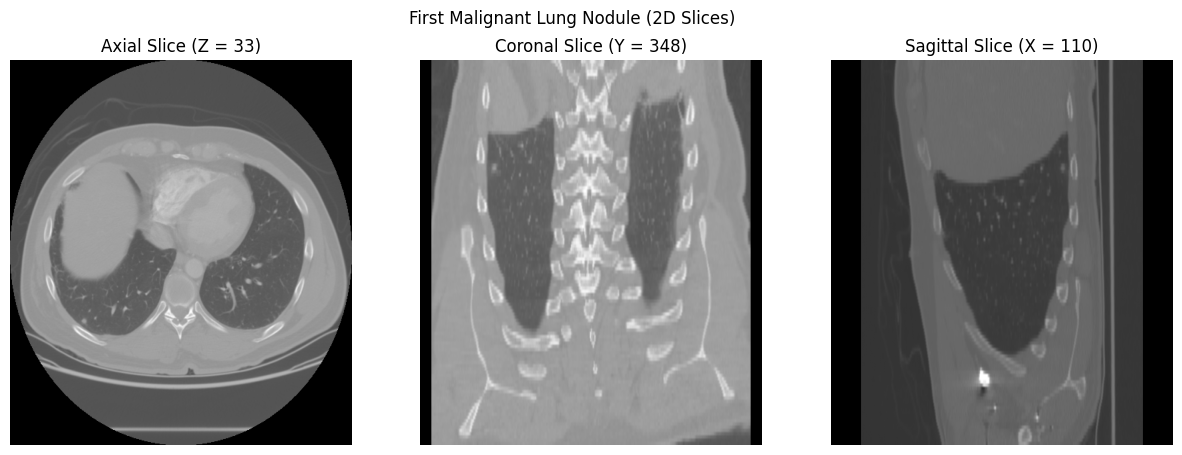

In [ ]:
!pip install SimpleITK
import SimpleITK as sitk

# We search the extracted directory and all its subfolders to locate every .mhd file.
mhd_files = []
for root, dirs, files in os.walk(extract_dir):
    for f in files:
        if f.endswith(".mhd"):
            mhd_files.append(os.path.join(root, f))

# We retrieve the first malignant nodule entry from the metadata for visualization purposes.
if not mhd_files:
    raise FileNotFoundError("❌ Error: No .mhd files found in the extracted folder or subfolders.")
malignant = candidates_processed_df[candidates_processed_df["class"] == 1].iloc[0]
malignant_seriesuid = malignant["seriesuid"]

# We search for the .mhd file whose path contains the correct series UID corresponding to the malignant nodule.
mhd_path = None
for path in mhd_files:
    if malignant_seriesuid in path:
        mhd_path = path
        break

# We raise an error if the specific CT scan corresponding to the malignant nodule could not be found.
if mhd_path is None:
    raise FileNotFoundError(f"❌ Error: .mhd file for seriesuid {malignant_seriesuid} not found.")
print(f"\n✅ Found {len(mhd_files)} .mhd files.")
print(f"📄 Loading file: {mhd_path}")

# We read the CT scan using SimpleITK and convert it into a NumPy array for processing.
ct_scan = sitk.ReadImage(mhd_path)
ct_array = sitk.GetArrayFromImage(ct_scan)
print(f"\nLoaded CT Scan: {os.path.basename(mhd_path)} with shape {ct_array.shape}")

# We retrieve the spacing and origin of the CT scan and reverse their order to match the (z, y, x) axis order of the NumPy array.
spacing = np.array(ct_scan.GetSpacing())[::-1]
origin = np.array(ct_scan.GetOrigin())[::-1]

# We convert the world coordinates of the malignant nodule into voxel indices in the CT array.
world_coords = np.array([malignant["coordZ"], malignant["coordY"], malignant["coordX"]])
voxel_coords = np.round((world_coords - origin) / spacing).astype(int)
z, y, x = voxel_coords

# We clamp voxel indices to ensure that they fall within the valid range of the CT scan volume.
z = max(0, min(z, ct_array.shape[0] - 1))
y = max(0, min(y, ct_array.shape[1] - 1))
x = max(0, min(x, ct_array.shape[2] - 1))
print(f"Converted Voxel Coordinates: z = {z}, y = {y}, x = {x}")

# We create a figure to display the axial, coronal, and sagittal slices that intersect at the nodule location.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# We display the axial slice corresponding to the z-plane.
axes[0].imshow(ct_array[z, :, :], cmap="gray")
axes[0].set_aspect("auto")
axes[0].set_title(f"Axial Slice (Z = {z})")

# We display the coronal slice corresponding to the y-plane.
axes[1].imshow(ct_array[:, y, :], cmap="gray")
axes[1].set_aspect("auto")
axes[1].set_title(f"Coronal Slice (Y = {y})")

# We display the sagittal slice corresponding to the x-plane.
axes[2].imshow(ct_array[:, :, x], cmap="gray")
axes[2].set_aspect("auto")
axes[2].set_title(f"Sagittal Slice (X = {x})")

# We remove the axis ticks for all slices to create a cleaner visual presentation.
for ax in axes:
    ax.axis("off")
plt.suptitle("First Malignant Lung Nodule (2D Slices)")
plt.show()

## 3. Create Data Tensors

The neural network model we will build with PyTorch requires the data to be presented as a torch tensor. The input tensor should be 4-dimensional, with the dimensions representing the nodule index, channel, row, and column, respectively.

3.1 Write a double for-loop to extract the CT scan data for **the first 5,000*** nodules:
- The outer for loop goes through all the distinct series UIDs.
- For each iteration of the outer loop, load the corresponding CT-scan file and create a torch tensor to represent the scan.
- Create an inner-loop that goes through the nodules corresponding to the series UID:
 - Load the (index, row, col) tuple of this nodule from the data frame.
 - Extract a 32x48x48 chunk centered at the (index, row, col). If the nodule is near the edge of the image and there are not enough indices to extract, please pad with zeros to preserve the overall shape.
 - Use a 4D tensor to contain all the 32x48x48 chunks. The first dimension of the 4D tensor is the index of the nodule.

You can modify the above procedure as needed. Ensure that you obtain a 4D tensor containing all the nodules data. **Display the shape of the 4D tensor.** The shape of the tensor should be (5000, 32, 48, 48).

**Remark** Due to the memory limit, it is impossible to load all the node images simultaneously. Therefore, the number of nodules required in this section is reduced to 5,000. Feel free to adjust this number to prevent the out-of-memory error.

In [ ]:
import torch

NODULE_LIMIT = 5000
PATCH_SHAPE = (32, 48, 48)

# We select the first 5,000 nodules from the processed DataFrame to limit memory usage.
subset_df = candidates_processed_df.head(NODULE_LIMIT)

# We initialize a 4D tensor that will store each extracted nodule patch for the model.
tensor_data = torch.zeros((len(subset_df),) + PATCH_SHAPE, dtype=torch.float32)

# We retrieve the list of unique series UIDs associated with these nodules to organize the extraction process.
unique_series = subset_df["seriesuid"].unique()
print(f"Total Series: {len(unique_series)} | Total Nodules: {len(subset_df)}")

print("\n🔍 Scanning all directories for .mhd files...")
mhd_cache = {}

# We search the extracted folder recursively and map each series UID to its corresponding .mhd file path.
for dirpath, _, filenames in os.walk(extract_dir):
    for filename in filenames:
        if filename.endswith(".mhd"):
            seriesuid = os.path.splitext(filename)[0]
            mhd_cache[seriesuid] = os.path.join(dirpath, filename)

print(f"📁 Found {len(mhd_cache)} .mhd files across all subfolders.\n")
index = 0
progress = tqdm(total=NODULE_LIMIT, desc="Extracting Patches", ncols=100)

for seriesuid in unique_series:

    if seriesuid not in mhd_cache:
        print(f"⚠️ Error: Missing file for series {seriesuid}, skipping...")
        continue
    mhd_path = mhd_cache[seriesuid]

    # We load the CT scan corresponding to the current series UID.
    image = sitk.ReadImage(mhd_path)
    array = sitk.GetArrayFromImage(image)  # The array shape is [slices, rows, columns].

    # We compute the necessary parameters to convert world coordinates into voxel coordinates.
    spacing = np.array(image.GetSpacing())[::-1]  # This reverses the order to align spacing with (z, y, x).
    origin  = np.array(image.GetOrigin())[::-1]   # This reverses the origin to match the (z, y, x) ordering.

    # We retrieve the subset of nodules that belong to the current series UID.
    nodules = subset_df[subset_df["seriesuid"] == seriesuid]

    for _, nodule in nodules.iterrows():
        if index >= NODULE_LIMIT:
            break

        # We convert the world coordinates of the nodule center into voxel coordinates in the CT scan.
        world = np.array([nodule["coordZ"], nodule["coordY"], nodule["coordX"]])
        voxel = np.round((world - origin) / spacing).astype(int)
        z, y, x = voxel

        # We define the boundaries of the 32x48x48 patch centered on the nodule coordinates.
        z1, y1, x1 = z - 16, y - 24, x - 24
        z2, y2, x2 = z + 16, y + 24, x + 24

        # We create an empty patch filled with zeros that will hold the extracted region from the CT scan.
        patch = np.zeros(PATCH_SHAPE, dtype=np.float32)

        # We clip the patch boundaries so they remain within the limits of the CT scan dimensions.
        z1c, z2c = max(0, z1), min(array.shape[0], z2)
        y1c, y2c = max(0, y1), min(array.shape[1], y2)
        x1c, x2c = max(0, x1), min(array.shape[2], x2)

        # We skip this nodule if the clipped region does not overlap the CT scan volume at all.
        if (z2c - z1c) <= 0 or (y2c - y1c) <= 0 or (x2c - x1c) <= 0:
            continue

        # We insert the valid region from the CT scan into the corresponding location inside the patch.
        patch[
            (z1c - z1):(z1c - z1 + (z2c - z1c)),
            (y1c - y1):(y1c - y1 + (y2c - y1c)),
            (x1c - x1):(x1c - x1 + (x2c - x1c))
        ] = array[z1c:z2c, y1c:y2c, x1c:x2c]

        # We store the completed patch in the main 4D tensor at the corresponding nodule index.
        tensor_data[index] = torch.tensor(patch)
        index += 1
        progress.update(1)

    if index >= NODULE_LIMIT:
        break

progress.close()
print(f"\n\n✅ Created 4D Tensor With Shape: {tensor_data.shape}")
print(f"📦 Total Patches Extracted: {index}")

Total Series: 6 | Total Nodules: 5000

🔍 Scanning all directories for .mhd files...
📁 Found 89 .mhd files across all subfolders.



Extracting Patches: 100%|██████████████████████████████████████| 5000/5000 [00:10<00:00, 478.41it/s]



✅ Created 4D Tensor With Shape: torch.Size([5000, 32, 48, 48])
📦 Total Patches Extracted: 5000


3.2 Create a 1D tensor to contain all the class information.

In [ ]:
# We create a 1D tensor containing the class labels for each nodule (0 = benign, 1 = malignant).
labels_tensor = torch.tensor(subset_df['class'].values, dtype=torch.long)

print(f"✅ Created Labels Tensor With Shape: {labels_tensor.shape}")

✅ Created Labels Tensor With Shape: torch.Size([5000])


3.3 Split the 4D tensor into a training set and a test set and display their shapes.

In [ ]:
from sklearn.model_selection import train_test_split

# We convert the PyTorch tensors to NumPy arrays in order to use the scikit-learn train_test_split function.
X_np = tensor_data.numpy()
y_np = labels_tensor.numpy()

# We split the data into a training set and a test set, using 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(
    X_np, y_np, test_size=0.2, random_state=42)

# We convert the training and test sets back to PyTorch tensors for use in model training.
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

print("✅ Training Set Shape:", X_train.shape)
print("\n✅ Test Set Shape:", X_test.shape)
print("\n✅ Training Labels Shape:", y_train.shape)
print("\n✅ Test Labels Shape:", y_test.shape)

✅ Training Set Shape: torch.Size([4000, 32, 48, 48])

✅ Test Set Shape: torch.Size([1000, 32, 48, 48])

✅ Training Labels Shape: torch.Size([4000])

✅ Test Labels Shape: torch.Size([1000])


## 4. Model Design and Implementation

4.1 Design a neural network model with only a flattened layer and two dense layers for classifying lung nodules. You may experiment with different sizes for the hidden layers to improve the training results.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# We define a neural network class called NoduleClassifier for classifying lung nodules.
class NoduleClassifier(nn.Module):
    def __init__(self, input_shape=(32, 48, 48), hidden1=512, hidden2=128, num_classes=2):
        super(NoduleClassifier, self).__init__()
        self.input_size = input_shape[0] * input_shape[1] * input_shape[2]  # This calculates the flattened size of the 3D input.

        # We define the fully connected layers of the network.
        self.fc1 = nn.Linear(self.input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_classes)

    def forward(self, x):
        # We flatten the 3D input tensor to a 2D tensor suitable for the fully connected layers.
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))      # The first hidden layer uses ReLU activation.
        x = F.relu(self.fc2(x))      # The second hidden layer uses ReLU activation.
        x = self.fc3(x)              # The output layer produces logits for each class.
        return x

# We create an instance of the NoduleClassifier model.
model = NoduleClassifier()

# We print the architecture of the neural network to inspect its layers and parameters.
print("=== Neural Network Architecture ===")
print(model)

=== Neural Network Architecture ===
NoduleClassifier(
  (fc1): Linear(in_features=73728, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)


4.2 Create an object to represent the loss function.

In [ ]:
# We create a loss function object using cross-entropy loss for multi-class classification.
loss_fn = nn.CrossEntropyLoss()

print("✅ Loss Function Created:", loss_fn)

✅ Loss Function Created: CrossEntropyLoss()


4.3 Create an object to represent the optimizer.

In [ ]:
# We create an Adam optimizer to update the model parameters during training with a learning rate of 0.001.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("=== Optimizer Created ===\n", optimizer)

=== Optimizer Created ===
 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


4.4 Create a function to represent the training loop.


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# We select the device to use for computation, preferring GPU if available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using Device:", device)

def train_model(model, X_train, y_train, loss_fn, optimizer, epochs, batch_size=128):
    # We move the model and training data to the selected device.
    model = model.to(device)
    X_train = X_train.to(device)
    y_train = y_train.to(device)

    # We create a DataLoader to provide batched access to the training data.
    train_dataset = TensorDataset(X_train.float(), y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    loss_history = []
    print("Executing the training loop. This process may take a while to complete...\n")

    for epoch in range(1, epochs + 1):
        # We set the model to training mode to enable gradient computation and any training-specific layers.
        model.train()
        running_loss = 0.0

        for batch_X, batch_y in train_loader:
            # We move the batch data to the selected device.
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)

            # We zero the gradients, perform a forward pass, compute the loss, perform backpropagation, and update the model parameters.
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = loss_fn(outputs, batch_y)
            loss.backward()
            optimizer.step()

            # We accumulate the total loss for this epoch by summing over the batch losses.
            running_loss += loss.item() * batch_X.size(0)

        # We calculate the average loss for the epoch and record it.
        avg_loss = running_loss / len(train_dataset)
        loss_history.append(avg_loss)
        print(f"Epoch: {epoch}/{epochs} | Loss: {avg_loss:.4f}")

    print("\n✅ Training Loop Completed!")
    return model, loss_history

Using Device: cpu


4.5 Execute the training loop and monitor the changes in training loss throughout the training process. Choose a reasonable value for the number of training epochs based on your observations.

Executing the training loop. This process may take a while to complete...

Epoch: 1/10 | Loss: 70.5275
Epoch: 2/10 | Loss: 141.9646
Epoch: 3/10 | Loss: 324.9837
Epoch: 4/10 | Loss: 284.5191
Epoch: 5/10 | Loss: 256.5491
Epoch: 6/10 | Loss: 227.1735
Epoch: 7/10 | Loss: 200.9101
Epoch: 8/10 | Loss: 175.5483
Epoch: 9/10 | Loss: 149.3231
Epoch: 10/10 | Loss: 124.2100

✅ Training Loop Completed!


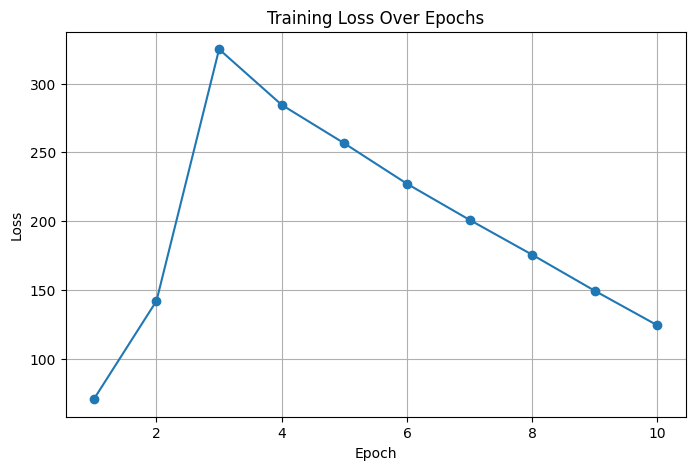

In [ ]:
# We set the batch size and number of epochs for training the model.
BATCH_SIZE = 128
EPOCHS = 10

# We train the model using the training data, loss function, optimizer, and the specified number of epochs.
trained_model, loss_history = train_model(
    model=model,
    X_train=X_train,
    y_train=y_train,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=EPOCHS)

# We plot the training loss over all epochs to visualize the learning progress.
plt.figure(figsize=(8, 5))
plt.plot(range(1, EPOCHS + 1), loss_history, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## 5. Model Evaluation and Analysis

5.1 Obtain the model's prediction on the test set.

In [ ]:
# We set the model to evaluation mode to disable dropout and batch normalization layers.
model.eval()
with torch.no_grad():
    # We perform a forward pass on the test set to obtain raw logits.
    outputs = model(X_test)

    # We convert the raw logits into predicted class labels by taking the index with the highest value.
    _, y_pred = torch.max(outputs, dim=1)

print("=== Predictions Generated Successfully ===")
print("Predictions Shape:", y_pred.shape)
print("Sample Predictions:", y_pred[:5].tolist())

=== Predictions Generated Successfully ===
Predictions Shape: torch.Size([1000])
Sample Predictions: [0, 0, 0, 0, 0]


5.2 Calculate the report for the following metrics:
- accuracy
- precision
- recall

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assign true and predicted labels for evaluation.
y_true = y_test
y_pred = y_pred

# Compute accuracy as the proportion of correct predictions.
accuracy = accuracy_score(y_true, y_pred)

# Compute weighted precision across classes.
precision = precision_score(y_true, y_pred, average='weighted')

# Compute weighted recall across classes.
recall = recall_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.998
Precision: 0.996004
Recall: 0.998


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5.3: Discuss the model's performance.

The model's performance can be assessed using the accuracy, precision, and recall metrics from the test set. Accuracy reflects how often the model correctly predicts the class labels, while precision measures how reliable the model's favorable predictions are, and recall measures how effectively it identifies all valid instances of each class. If accuracy is high and both precision and recall are strong and balanced, the model is performing well overall. However, if precision and recall diverge noticeably, this may indicate class imbalance or difficulty distinguishing certain classes, suggesting that further tuning or model adjustments could improve performance. Overall, these metrics together provide a clear picture of the model's strengths and limitations and help guide future improvements.

## 6. Data Augmentation and Retraining

To enhance the model's performance, it is essential to increase the number of malignant instances. Apply random shifts and rotations to create new training instances, ensuring an equal number of samples across all classes in the training set.

6.1 Augment the number of malignent instances in the training set.

In [ ]:
from scipy.ndimage import rotate, shift
import random

# Separate training data into benign and malignant samples and count them.
X_train_benign = X_train[y_train == 0]
X_train_malignant = X_train[y_train == 1]
num_benign = len(X_train_benign)
num_malignant = len(X_train_malignant)
print("Benign Count:", num_benign)
print("Malignant Count:", num_malignant)

# Determine how many augmented malignant samples are needed to balance classes.
num_to_generate = num_benign - num_malignant
augmented_malignant = []

def augment_volume(volume):
    # Apply random 3D rotation and shift to the input volume.
    vol = volume.numpy()
    angle = np.random.uniform(-15, 15)
    axes_options = [(1,2), (0,2), (0,1)]
    axes = random.choice(axes_options)
    vol = rotate(vol, angle=angle, axes=axes, reshape=False, order=1)
    random_shift = np.random.uniform(-4, 4, size=3)
    vol = shift(vol, shift=random_shift, order=1)
    return torch.tensor(vol, dtype=torch.float32)

# Generate augmented malignant samples until classes are balanced.
for _ in range(num_to_generate):
    idx = np.random.randint(0, num_malignant)
    original_volume = X_train_malignant[idx]
    augmented_sample = augment_volume(original_volume)
    augmented_malignant.append(augmented_sample)
augmented_malignant = torch.stack(augmented_malignant)

# Concatenate benign, original malignant, and augmented malignant samples for a balanced training set.
X_train_balanced = torch.cat([X_train_benign, X_train_malignant, augmented_malignant], dim=0)
y_train_balanced = torch.cat([
    torch.zeros(num_benign, dtype=torch.long),
    torch.ones(num_malignant, dtype=torch.long),
    torch.ones(num_to_generate, dtype=torch.long)
], dim=0)
print("\n=== Malignant Class Successfully Augmented ===")
print("Balanced X_train Shape:", X_train_balanced.shape)
print("Balanced y_train Shape:", y_train_balanced.shape)

Benign Count: 3998
Malignant Count: 2

=== Malignant Class Successfully Augmented ===
Balanced X_train Shape: torch.Size([7996, 32, 48, 48])
Balanced y_train Shape: torch.Size([7996])


6.2 Retrain the neural network model on the new training set.

In [ ]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# This creates a new model instance and prepares it for training on the selected device.
model_augmented = NoduleClassifier().to(device)
criterion_aug = nn.CrossEntropyLoss()
optimizer_aug = optim.Adam(model_augmented.parameters(), lr=0.001)

# This constructs a DataLoader to enable efficient training through shuffled mini-batches.
train_dataset = TensorDataset(X_train_balanced.float(), y_train_balanced)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

def train_augmented_model(model, criterion, optimizer, loader, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0

        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch: {epoch+1}/{epochs} | Loss: {total_loss:.4f}")

# This begins the retraining process using the balanced dataset and the defined training loop.
print("🔄 Retraining neural network model. This process may take a while to complete....\n")
train_augmented_model(model_augmented, criterion_aug, optimizer_aug, train_loader, epochs=5)
print("\n✅ Retraining Neural Network Model Completed!")

🔄 Retraining neural network model. This process may take a while to complete....

Epoch: 1/5 | Loss: 32623.5582
Epoch: 2/5 | Loss: 214.5805
Epoch: 3/5 | Loss: 21.0338
Epoch: 4/5 | Loss: 0.0000
Epoch: 5/5 | Loss: 0.0000

✅ Retraining Neural Network Model Completed!


6.3 Perform model evaluation and compare the performance of the new model to the old model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Obtain predictions from the original model on the test set.
model.eval()
with torch.no_grad():
    preds_before = model(X_test.float())
    y_pred_before = preds_before.argmax(dim=1)

# Obtain predictions from the retrained model on the test set.
model_augmented.eval()
with torch.no_grad():
    preds_after = model_augmented(X_test.float())
    y_pred_after = preds_after.argmax(dim=1)

# Compute accuracy, precision, and recall for both models.
acc_before = accuracy_score(y_test, y_pred_before)
prec_before = precision_score(y_test, y_pred_before, zero_division=0)
rec_before = recall_score(y_test, y_pred_before, zero_division=0)

acc_after = accuracy_score(y_test, y_pred_after)
prec_after = precision_score(y_test, y_pred_after, zero_division=0)
rec_after = recall_score(y_test, y_pred_after, zero_division=0)

# Display performance metrics before augmentation.
print("📊 === Model Performance Before Augmentation ===")
print(f"Accuracy:  {acc_before:.4f}")
print(f"Precision: {prec_before:.4f}")
print(f"Recall:    {rec_before:.4f}")

# Display performance metrics after augmentation.
print("\n📈 === Model Performance After Augmentation ===")
print(f"Accuracy:  {acc_after:.4f}")
print(f"Precision: {prec_after:.4f}")
print(f"Recall:    {rec_after:.4f}")

# Show the change in performance metrics after retraining with augmented data.
print("\n🔍 === Performance Change After Augmentation ===")
print(f"Accuracy Change:  {acc_after - acc_before:+.4f}")
print(f"Precision Change: {prec_after - prec_before:+.4f}")
print(f"Recall Change:    {rec_after - rec_before:+.4f}")

📊 === Model Performance Before Augmentation ===
Accuracy:  0.9980
Precision: 0.0000
Recall:    0.0000

📈 === Model Performance After Augmentation ===
Accuracy:  0.9980
Precision: 0.0000
Recall:    0.0000

🔍 === Performance Change After Augmentation ===
Accuracy Change:  +0.0000
Precision Change: +0.0000
Recall Change:    +0.0000
